# Simple Tumor Detection - Logistic Regression & Probability
In this small project we test the logistic regression to categorize tumors as evil or good for a small dataset with the tumorsize as feature. After that we are calculating the probability if a tumor is evil from the equation coefficients and visualize the regression curve.

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

Text(0, 0.5, 'Evil')

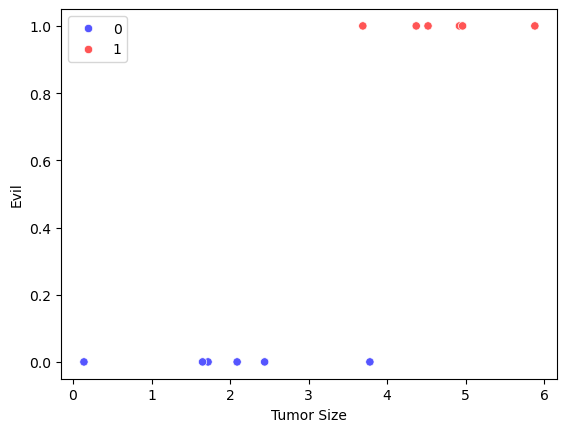

In [113]:
# Visualize data

X = [3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]
y = [0,0,0,0,0,0,1,1,1,1,1,1]

p = sns.scatterplot(x=X, y=y, hue=y , palette="seismic")
plt.xlabel("Tumor Size")
plt.ylabel("Evil")

In [117]:
# Train LogisticRegression model and predict label for new value

X1 = np.array(X).reshape(-1,1)
y1 = np.array(y).ravel()

log_model = LogisticRegression()
log_model.fit(X1,y1)

new_tumor = [1.46]
predicted_evil = log_model.predict(np.array(new_tumor).reshape(-1,1)) == 1
print(f'Is Tumor evil? {predicted_evil}')

Is Tumor evil? [False]


In [65]:
# Details of Logistic Function

b0 = log_model.intercept_
b1 = log_model.coef_
odds = np.exp(b1)

print(f'Coefficient = {b1[0][0]} / Intercept = {b0[0]} / Odds = {odds[0][0]}')

Coefficient = 1.3951482870323777 / Intercept = -4.836879792432107 / Odds = 4.0355729514021075


In [103]:
# Calculate probability for tumor evil
# for binary logistic regression: logit(p) = log(p/(1-p)) = b0+b1*x

def prob_binary_log_regression(log_model, X):
    logit = log_model.intercept_ + log_model.coef_*X
    prob = 1/(1+np.exp(-logit))
    return prob

prob_a = prob_binary_log_regression(log_model, new_tumor)
print(f'The new tumor is evil with a probabilitiy of: {round(prob_a[0][0]*100,2)} %')

The new tumor is evil with a probabilitiy of: 5.73 %


In [101]:
# Using sklearn for probability calculation

prob_b = log_model.predict_proba(np.array(new_tumor).reshape(-1,1))
print(f'The new tumor is evil with a probabilitiy of: {round(prob_b[0][1]*100,2)} %')

The new tumor is evil with a probabilitiy of: 5.73 %


<Axes: >

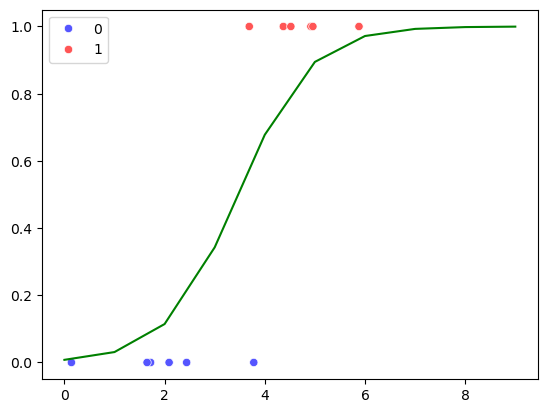

In [127]:
# Visualize logistic regression function

x_range = 10
Xr = [i for i in range(x_range)]
yr = [log_model.predict_proba([[j]])[0][1] for j in range(x_range)]

fig, ax = plt.subplots()
sns.lineplot(x=Xr, y=yr, color="green", ax=ax)
sns.scatterplot(x=X, y=y, hue=y , palette="seismic", ax=ax)